In [1]:
import hype as hy

In [2]:
hy.model.observables

ComponentSet([
 Observable('obsR', R(phos='u')),
 Observable('obsRp', R(phos='p')),
 Observable('obsS', S()),
 ])

In [2]:
from pysb.simulator import ScipyOdeSimulator
import pylab as pl

In [4]:
t = pl.linspace(0, 100, 1000)

In [1]:
simres = ScipyOdeSimulator(hy.model, tspan=t, compiler='python').run()
yout = simres.all

NameError: name 'ScipyOdeSimulator' is not defined

In [ ]:
pl.ion()
pl.figure()
pl.plot(t, yout['obsRp'], label="Rp")
pl.legend()
pl.xlabel("Time (s)")
pl.ylabel("uM")
pl.show()

In [6]:
signal = pl.linspace(0,10,101)
response = []

In [7]:
for s in signal:
    hy.model.parameters.S_0.value = s
    simres = ScipyOdeSimulator(hy.model, tspan=t, compiler='python').run()
    yout = simres.all
    response.append(yout['obsRp'][-1])

Exception: The program BioNetGen was not found in the default search path(s) for your operating system:

/usr/local/share/BioNetGen
/Users/victoriahoward/opt/anaconda3/bin
/Users/victoriahoward/opt/anaconda3/condabin
/Users/victoriahoward/bin
/usr/local/opt
/usr/local/bin
/usr/bin
/bin
/usr/sbin
/sbin
/Library/TeX/texbin
/opt/X11/bin
/usr/local
/usr/local/sbin

Either install it to one of those paths, or set a custom path using the environment variable BNGPATH or by calling the function pysb.pathfinder.set_path()

Conda users can install BioNetGen using the following command:

conda install -c alubbock bionetgen

ValueError: x and y must have same first dimension, but have shapes (101,) and (0,)

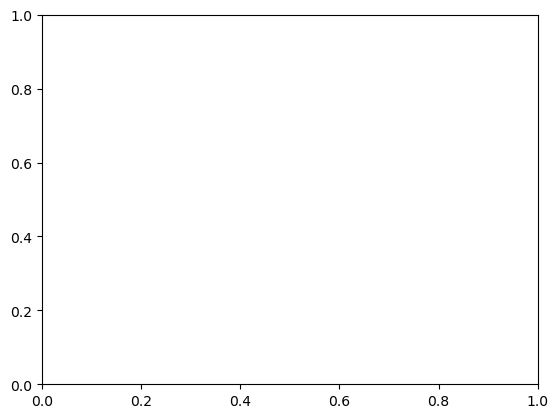

In [8]:
pl.ion()
pl.figure()
pl.plot(signal, response, label="hyperbolic")
pl.legend()
pl.xlabel("Signal")
pl.ylabel("Rp")
pl.show()